## predict zombie houses project

### 1. imported data from 

a. Buffalo 311 Service Request Data
https://data.buffalony.gov/Quality-of-Life/311-Service-Requests/whkc-e5vr

b. Buffalo Code Violations Data
https://data.buffalony.gov/Quality-of-Life/Code-Violations/ivrf-k9vm

c. Detroit Service Request Data
https://data.detroitmi.gov/datasets/improve-detroit-issues?geometry=-87.344%2C41.829%2C-82.117%2C42.541

d. Detroit Code Violations
https://data.detroitmi.gov/datasets/blight-violations?geometry=-83.755%2C42.259%2C-82.448%2C42.436

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

In [2]:
urla="https://data.buffalony.gov/resource/whkc-e5vr.geojson?$limit=1000000&\
$where=open_date%20between%20%272018-01-01T00:00:00%27%20and%20%272020-06-01T00:00:00%27"
#?method=export&format=GeoJSON"
dfa= gpd.read_file(urla)
dfa.shape

(178393, 30)

In [3]:
pd.options.display.max_columns = None
dfa = dfa[dfa.geometry.notnull()]
dfa=dfa.to_crs('epsg:3857')
dfa.head()

,location_state,zip_code,city,location_zip,police_district,x_coordinate,subject,latitude,state,neighborhood,location_address,object_type,location_city,property_id,census_block,reason,longitude,case_reference,status,address_line_2,census_block_group,y_coordinate,census_tract,open_date,address_number,type,address_line_1,closed_date,council_district,geometry
0,None,14215,Buffalo,None,District E,-78.80038,Buffalo Police Department,42.92111112378985,NY,UNKNOWN,None,Property,None,90.83-3-14,1001,Police,-78.80023936389244,250075-1000795027,Closed,None,1,42.92157,38,2018-01-01T12:00:00,126,Police Issue (Req_Serv),ERB,2018-01-02T11:02:00,LOVEJOY,POINT (-8772002.520 5299971.854)
1,None,14201,Buffalo,None,District B,-8780753.266,DPIS,42.89028271102839,NY,UNKNOWN,None,Property,None,111.37-6-18.112,2008,Housing,-78.87874336527811,1000795028,Closed,None,2,5295266.7552,71.02,2018-01-01T12:54:00,46,Snow Removal Inspection (Req_Serv),CARY,2018-01-02T14:21:00,FILLMORE,POINT (-8780741.546 5295286.640)
3,None,14216,Buffalo,None,District D,-8779743.845,DPIS,42.94877103543398,NY,UNKNOWN,None,Property,None,78.62-3-30,1003,Housing,-78.86928284271013,1000795030,Closed,None,1,5304212.9366,50,2018-01-01T14:33:00,29,Housing Violations (Req_Serv),WILBURY,2018-01-02T09:10:00,NORTH,POINT (-8779688.405 5304177.524)
6,None,14210,Buffalo,None,District A,None,Dept of Public Works,42.84886022786773,NY,UNKNOWN,None,Property,None,133.35-5-1./A,1008,Engineering - Street Repairs,-78.80203866061602,1000795033,Closed,None,1,None,10,2018-01-01T19:30:00,2394,Pot Hole (Req_Serv),SENECA,2018-01-03T15:21:00,SOUTH,POINT (-8772202.817 5288995.054)
7,None,14210,Buffalo,None,District A,-8772975.333,Buffalo Police Department,42.85331415595921,NY,UNKNOWN,None,Property,None,133.25-4-12,3002,Police,-78.80978470030924,1000795034,Closed,None,3,5289721.9535,10,2018-01-01T20:28:00,87,Quality of Life Issue (Req_Serv),KINGSTON,2018-01-02T11:01:00,SOUTH,POINT (-8773065.102 5289671.351)


In [4]:
dfa.columns

Index(['location_state', 'zip_code', 'city', 'location_zip', 'police_district',
       'x_coordinate', 'subject', 'latitude', 'state', 'neighborhood',
       'location_address', 'object_type', 'location_city', 'property_id',
       'census_block', 'reason', 'longitude', 'case_reference', 'status',
       'address_line_2', 'census_block_group', 'y_coordinate', 'census_tract',
       'open_date', 'address_number', 'type', 'address_line_1', 'closed_date',
       'council_district', 'geometry'],
      dtype='object')

In [5]:
select=['latitude', 'longitude','open_date','type', 'geometry']

In [6]:
dfa=dfa[select]

In [7]:
dfa['type'].value_counts()

Housing Violations (Req_Serv)              22327
Totes Replace (Req_Serv)                   17126
Pot Hole (Req_Serv)                        13126
Garbage Missed Pick Up (Req_Serv)           6714
Rodents (Req_Serv)                          5591
                                           ...  
Obscene PW Traffic (Req_Serv)                  1
FOIL Records Adjudication (Req_Serv)           1
FOIL Records Human Resources (Req_Serv)        1
Obscene PW Engineering (Req_Serv)              1
FOIL Records EDPIS (Req_Serv)                  1
Name: type, Length: 158, dtype: int64

In [8]:
urlb="https://data.buffalony.gov/resource/ivrf-k9vm.geojson?$limit=1000000&\
$where=date%20between%20%272018-01-01T00:00:00%27%20and%20%272020-06-01T00:00:00%27"
#?method=export&format=GeoJSON"
dfb= gpd.read_file(urlb)
dfb.shape

(48835, 29)

In [9]:
dfb = dfb[dfb.geometry.notnull()]
dfb=dfb.to_crs('epsg:3857')
dfb.head()

,location_state,code_section,city,location_zip,police_district,latitude,zip,state,description,neighborhood,propclass,location_address,location_city,census_block,violation_location,longitude,code,date,status,inspector,uniquekey,census_block_group,census_tract,address,case_number,council_district,comments,case_type,geometry
0,,Unsafe Structures and Equipment,BUFFALO,,District C,42.89075498798033,14212,NY,Structure unfit for human occupancy,Broadway Fillmore,230,,,2003,258 SHERMAN,-78.84699894144154,IPMC-108.1.3,2018-01-02T00:00:00,COMPLIED,GERALD WILLIAMS,190274,2,15,258 SHERMAN,GEN17-9438838,ELLICOTT,"<P>floor beams, roof, porch unstucturally soun...",GENERAL,POINT (-8777207.773 5295358.397)
1,None,Electrical Equipment,BUFFALO,None,District C,42.89678185640461,14212,NY,Receptacles,UNKNOWN,0,None,None,2010,None,-78.82466642356013,IPMC-605.2,2018-01-02T00:00:00,ACTIVE,MONIQUE BATES,190328,2,28,216 PERSON,GEN18-9438915,FILLMORE,"repair non-working receptacles in dining room,...",GENERAL,POINT (-8774721.728 5296274.166)
2,None,Exterior Structure,BUFFALO,None,District C,42.88732097347045,14206,NY,Roofs and drainage,UNKNOWN,0,None,None,2012,None,-78.85299475987614,IPMC-304.7,2018-01-02T00:00:00,ACTIVE,THOMAS CARTER,190337,2,15,252 MADISON,GEN18-9438918,ELLICOTT,"roof worn, weathered, and peeling with tarp co...",GENERAL,POINT (-8777875.224 5294836.646)
3,None,Rubbish and Garbage,BUFFALO,None,District C,42.89678185640461,14212,NY,Accumulation of rubbish or garbage,UNKNOWN,0,None,None,2010,None,-78.82466642356013,IPMC-308.1,2018-01-02T00:00:00,ACTIVE,MONIQUE BATES,190321,2,28,216 PERSON,GEN18-9438915,FILLMORE,"Exterior property and premises, and the interi...",GENERAL,POINT (-8774721.728 5296274.166)
4,None,Buffalo Ordinance,BUFFALO,None,District B,42.88646198676673,14204,NY,PERMIT REQUIRED,UNKNOWN,0,None,None,4009,None,-78.86278347000778,B103.2,2018-01-02T00:00:00,ACTIVE,THOMAS CARTER,190333,4,14.02,160 BENNETT ST,GEN18-9438917,ELLICOTT,permit required for changing window framing si...,GENERAL,POINT (-8778964.898 5294706.140)


In [10]:
dfb.columns

Index(['location_state', 'code_section', 'city', 'location_zip',
       'police_district', 'latitude', 'zip', 'state', 'description',
       'neighborhood', 'propclass', 'location_address', 'location_city',
       'census_block', 'violation_location', 'longitude', 'code', 'date',
       'status', 'inspector', 'uniquekey', 'census_block_group',
       'census_tract', 'address', 'case_number', 'council_district',
       'comments', 'case_type', 'geometry'],
      dtype='object')

In [11]:
#pd.set_option('display.max_colwidth', -1)
dfb[['description','comments']].head(10)

,description,comments
0,Structure unfit for human occupancy,"<P>floor beams, roof, porch unstucturally soun..."
1,Receptacles,"repair non-working receptacles in dining room,..."
2,Roofs and drainage,"roof worn, weathered, and peeling with tarp co..."
3,Accumulation of rubbish or garbage,"Exterior property and premises, and the interi..."
4,PERMIT REQUIRED,permit required for changing window framing si...
5,Handrails,The hand rails are missing at the front stairs.
6,Roofs and drainage,"roof worn, weathered, and peeling"
7,Protective treatment,The exterior wood trim has chipped and peeling...
8,Structural members (interior),The structural components of the rear section ...
9,Overhang extensions,open eaves on front right corner


In [12]:
dfb=dfb[['police_district',  'description','geometry']]

### 2. Multi-data source merge

In [13]:
df=pd.merge(dfa,dfb,left_on='geometry',right_on='geometry')
df.head()

,latitude,longitude,open_date,type,geometry,police_district,description
0,42.85331415595921,-78.80978470030924,2018-01-01T20:28:00,Quality of Life Issue (Req_Serv),POINT (-8773065.102 5289671.351),District A,License/Permit
1,42.85331415595921,-78.80978470030924,2018-01-01T20:28:00,Quality of Life Issue (Req_Serv),POINT (-8773065.102 5289671.351),District A,PERMIT REQUIRED
2,42.85331415595921,-78.80978470030924,2018-01-01T20:28:00,Quality of Life Issue (Req_Serv),POINT (-8773065.102 5289671.351),District A,Stop Work Order
3,42.9236496085395,-78.88999485379269,2018-01-02T08:56:00,Graffiti Private Property (Req_Serv),POINT (-8781994.056 5300357.750),District D,SNOW & ICE REMOVAL
4,42.9236496085395,-78.88999485379269,2018-01-02T08:56:00,Graffiti Private Property (Req_Serv),POINT (-8781994.056 5300357.750),District D,"Window, skylight and door frames"


In [14]:
df.shape

(113135, 7)

### 3.Grouping statistics

In [16]:
group1=df.groupby(['type','description'],as_index=False)['type'].agg({'cnt':'count'})
group1=group1.sort_values(by='cnt',ascending=False)
group1=group1[group1.cnt>1000]

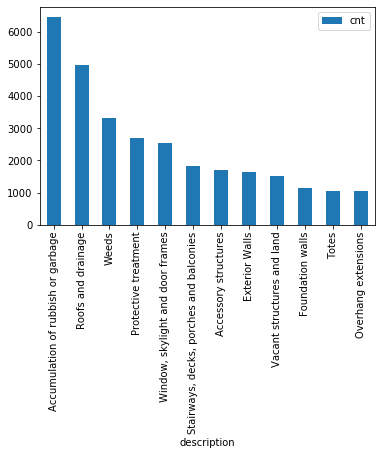

In [17]:
group2=group1[['description','cnt']]
group2.plot(x='description', y='cnt',kind='bar')
plt.show()

https://www.bpdny.org/171/Buffalo-Police-Districts-A-E

Buffalo Police Districts A-E

A-District 1847 South Park Avenue
Buffalo, NY 14220
![A-District](img/DA.gif)
B-District 695 Main Street
Buffalo, NY 14203
![B-District](img/DB.gif)
C-District 693 East Ferry
Buffalo, NY 14211
![C-District](img/DC.gif)
D-District 669 Hertel Avenue
Buffalo, NY 14207
![D-District](img/DD.gif)
E-District 2767 Bailey Avenue
Buffalo, NY 14215
![E-District](img/DE.gif)

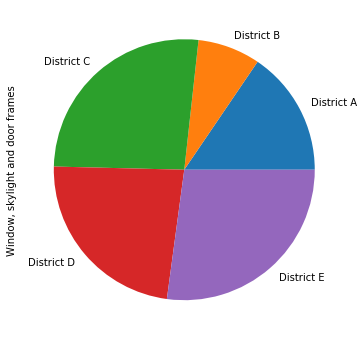

In [18]:
group3=df.groupby(['type','description','police_district'],as_index=False)['type'].agg({'cnt':'count'})
group3=group3.sort_values(by='cnt',ascending=False)
group3=group3[group3.cnt>100]
cross1=pd.crosstab(group3['police_district'],group3['description'])
cross2=cross1.cumsum(axis=1)
new1=cross2['Window, skylight and door frames']
new1.plot.pie(figsize=(6, 6))

In [1]:
# The number of types that occur in an area

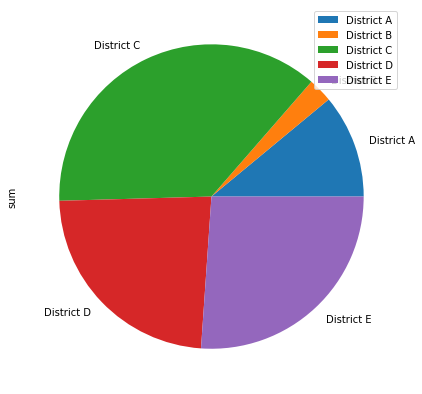

In [19]:
group4=df.groupby(['description','police_district'],as_index=False)['type'].agg({'cnt':'count'})
group4=group4.sort_values(by='cnt',ascending=False)
group4=group4[group4.cnt>1000]
new2=group4.groupby(['police_district'],as_index=False)['cnt'].agg(['sum','min','max'])
new2.plot.pie(y='sum',figsize=(7, 7))

#### The number of zombie houses that can occur in an area